In [1]:
# load modules
import sys
sys.path.append('../')
from imperial_floris.floris import Floris
import numpy as np
import matplotlib.pyplot as plt
from imperial_floris.visualization_manager import VisualizationManager
import imperial_floris.optimisation_manager as optimisation_manager  # MODIFIED modules used for optimizing FLORIS
import imp
import time
import copy

# See https://v2.overleaf.com/16702532wdkvyywcgsxh#!#%2F64036805%2F for more information

## Specify Case Study, Initialise File Names

In [2]:
# specify case study
case = 'case3'

# specify case file names
init_name = '{}_init'.format(case)
loc_name = '{}_loc'.format(case)
yaw_name = '{}_yaw'.format(case)
loc_yaw_name = '{}_loc_yaw'.format(case)
direction_name = '{}'

## No Optimisation 

Time to compute wake =  0.04619312286376953 s
Initial Power Output =  3.1164794497886983  MW


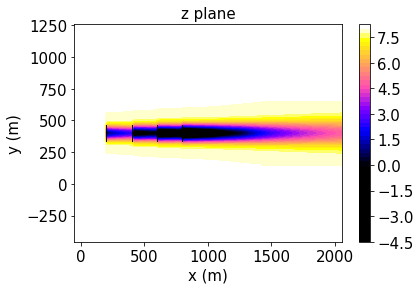

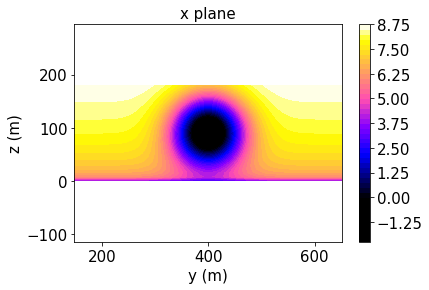

In [3]:
# start timer
t1 = time.time()
init_floris = Floris('{}.json'.format(case))
num_turbines = len(init_floris.farm.flow_field.turbine_map.turbine_map)

# determine initial power production
init_floris.farm.flow_field.calculate_wake()

# end timer and print time difference
t2 = time.time()
print('Time to compute wake = ', t2-t1, 's')

# calculate initial power and print
init_power = optimisation_manager.calc_power(init_floris)[1]
print('Initial Power Output = ', init_power/10**6, ' MW')

# plot initial wake_field
ff_viz = init_floris.farm.flow_field
visualization_manager = VisualizationManager(ff_viz, init_name, plot_wakes=True)
visualization_manager.plot_z_planes([0.5])
visualization_manager.plot_x_planes([0.5])

## Optimise Power Output for Turbine Locations Only with Basin-Hopping

Optimizing...
Number of parameters to optimize =  8
basinhopping step 0: f -3.06705e+06
basinhopping step 1: f -3.06705e+06 trial_f -3.06679e+06 accepted 0  lowest_f -3.06705e+06
basinhopping step 2: f -6.84802e+06 trial_f -6.84802e+06 accepted 1  lowest_f -6.84802e+06
found new global minimum on step 2 with function value -6.84802e+06
basinhopping step 3: f -6.84802e+06 trial_f -6.84802e+06 accepted 1  lowest_f -6.84802e+06
found new global minimum on step 3 with function value -6.84802e+06
basinhopping step 4: f -6.84802e+06 trial_f -6.84802e+06 accepted 1  lowest_f -6.84802e+06
found new global minimum on step 4 with function value -6.84802e+06
basinhopping step 5: f -6.84802e+06 trial_f -6.84802e+06 accepted 1  lowest_f -6.84802e+06
basinhopping step 6: f -6.84802e+06 trial_f -6.84802e+06 accepted 1  lowest_f -6.84802e+06
basinhopping step 7: f -6.84802e+06 trial_f -6.84802e+06 accepted 1  lowest_f -6.84802e+06
basinhopping step 8: f -6.84802e+06 trial_f -6.84802e+06 accepted 1  lo

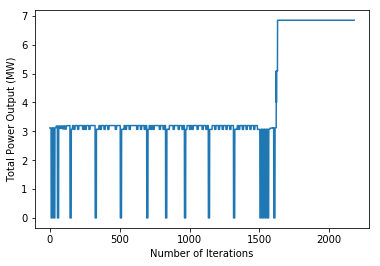

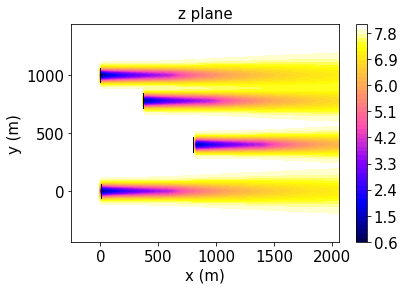

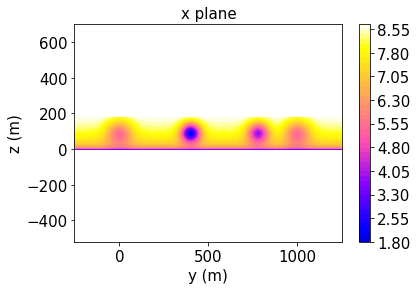

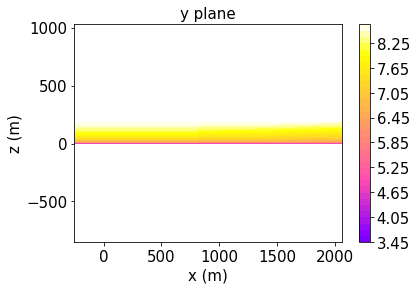

'\nnum_iterations = len(loc_data[1])\niteration = np.int(num_iterations / 2)\nloc_subopt_power = loc_data[2][iteration - 1]\nloc_subopt_params = loc_data[3][iteration - 1]\noptimisation_manager.print_output(loc_floris, loc_data, loc_subopt_params, init_power, loc_subopt_power, loc_variables, num_turbines, is_opt=False, plot_wakes=True)\n'

In [4]:
imp.reload(optimisation_manager)
loc_floris = Floris('{}.json'.format(case))
loc_variables=['layout_x', 'layout_y']

# set bounds for the optimization on the turbine locations
minimum_values = [0.0, 0.0]
maximum_values = [1000.0, 1000.0]

# compute the optimal turbine locations
loc_opt_params, loc_opt_power, loc_data = optimisation_manager.optimise_func(loc_floris, loc_variables, minimum_values, maximum_values, loc_name, case, global_search=True)

# print output at half-way iteration
"""
num_iterations = len(loc_data[1])
iteration = np.int(num_iterations / 2)
loc_subopt_power = loc_data[2][iteration - 1]
loc_subopt_params = loc_data[3][iteration - 1]
optimisation_manager.print_output(loc_floris, loc_data, loc_subopt_params, init_power, loc_subopt_power, loc_variables, num_turbines, is_opt=False, plot_wakes=True)
"""

## Optimise Power Output for Yaw Angle (for $300^\circ$) after Turbine Location (for $270^\circ$) with Basin-Hopping

Optimizing...
Number of parameters to optimize =  4
basinhopping step 0: f -6.30414e+06
basinhopping step 1: f -6.30414e+06 trial_f -6.30414e+06 accepted 1  lowest_f -6.30414e+06
basinhopping step 2: f -6.30414e+06 trial_f -6.30414e+06 accepted 1  lowest_f -6.30414e+06
found new global minimum on step 2 with function value -6.30414e+06
basinhopping step 3: f -6.30414e+06 trial_f -6.30414e+06 accepted 1  lowest_f -6.30414e+06
basinhopping step 4: f -6.30414e+06 trial_f -6.30414e+06 accepted 1  lowest_f -6.30414e+06
basinhopping step 5: f -6.30414e+06 trial_f -6.30414e+06 accepted 1  lowest_f -6.30414e+06
basinhopping step 6: f -6.30414e+06 trial_f -6.30414e+06 accepted 1  lowest_f -6.30414e+06
basinhopping step 7: f -6.30414e+06 trial_f -6.30414e+06 accepted 1  lowest_f -6.30414e+06
basinhopping step 8: f -6.30414e+06 trial_f -6.30414e+06 accepted 1  lowest_f -6.30414e+06
basinhopping step 9: f -6.30414e+06 trial_f -6.30414e+06 accepted 1  lowest_f -6.30414e+06
basinhopping step 10: f -

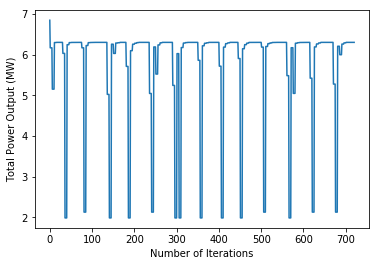

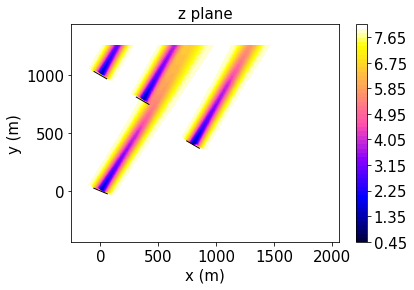

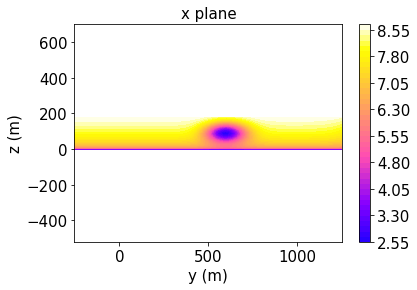

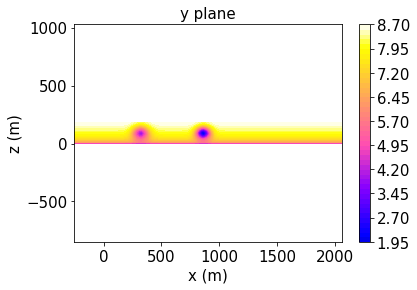

'\nnum_iterations = len(loc_data[1])\niteration = np.int(num_iterations / 2)\nloc_yaw_subopt_power = loc_yaw_data[2][iteration - 1]\nloc_yaw_subopt_params = loc_yaw_data[3][iteration - 1]\noptimisation_manager.print_output(floris, loc_yaw_data, loc_yaw_subopt_params, init_power, loc_yaw_subopt_power, yaw_variables, num_turbines, is_opt=False, plot_wakes=True)\n'

In [5]:
# set variable(s) to optimise for
imp.reload(optimisation_manager)
yaw_variables=['yaw_angle']

# set bounds for the optimization on the turbine parameters (radians for angles)
minimum_values = [-1]
maximum_values = [1]

# compute the optimal yaw angles
loc_floris.farm.flow_field.wind_direction = np.radians(300.0)
loc_yaw_opt_params, loc_yaw_opt_power, loc_yaw_data = optimisation_manager.optimise_func(loc_floris, yaw_variables, minimum_values, maximum_values, loc_yaw_name, case, global_search=True)

# print output at halfway iteration
"""
num_iterations = len(loc_data[1])
iteration = np.int(num_iterations / 2)
loc_yaw_subopt_power = loc_yaw_data[2][iteration - 1]
loc_yaw_subopt_params = loc_yaw_data[3][iteration - 1]
optimisation_manager.print_output(floris, loc_yaw_data, loc_yaw_subopt_params, init_power, loc_yaw_subopt_power, yaw_variables, num_turbines, is_opt=False, plot_wakes=True)
"""

## Optimise Power Output for Yaw Angle Only with Basin-Hopping

Optimizing...
Number of parameters to optimize =  4
basinhopping step 0: f -3.11648e+06
basinhopping step 1: f -3.29742e+06 trial_f -3.29742e+06 accepted 1  lowest_f -3.29742e+06
found new global minimum on step 1 with function value -3.29742e+06
basinhopping step 2: f -3.29742e+06 trial_f -3.29742e+06 accepted 1  lowest_f -3.29742e+06
basinhopping step 3: f -3.29742e+06 trial_f -3.29742e+06 accepted 1  lowest_f -3.29742e+06
found new global minimum on step 3 with function value -3.29742e+06
basinhopping step 4: f -3.29742e+06 trial_f -3.29742e+06 accepted 1  lowest_f -3.29742e+06
basinhopping step 5: f -3.29742e+06 trial_f -3.29742e+06 accepted 1  lowest_f -3.29742e+06
found new global minimum on step 5 with function value -3.29742e+06
basinhopping step 6: f -3.29742e+06 trial_f -3.29742e+06 accepted 1  lowest_f -3.29742e+06
basinhopping step 7: f -3.29742e+06 trial_f -3.29742e+06 accepted 1  lowest_f -3.29742e+06
found new global minimum on step 7 with function value -3.29742e+06
bas

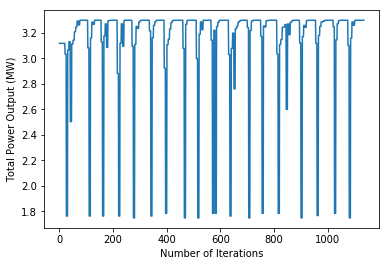

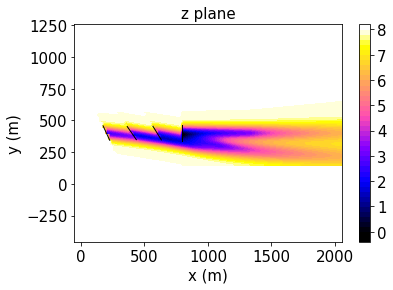

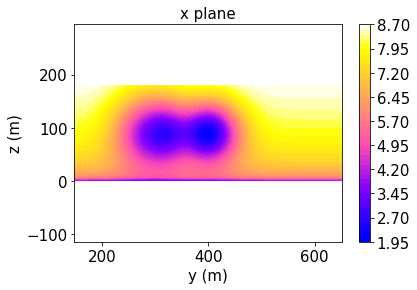

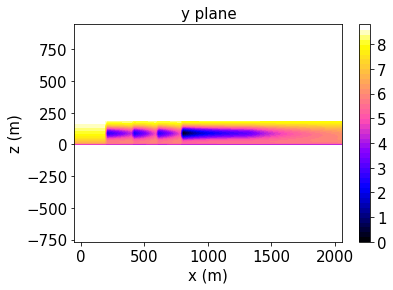

'\nnum_iterations = len(loc_data[1])\niteration = np.int(num_iterations / 2)\nyaw_subopt_power = data[2][iteration - 1]\nyaw_subopt_params = data[3][iteration - 1]\noptimisation_manager.print_output(yaw_floris, data, yaw_subopt_params, init_power, yaw_subopt_power, yaw_variables, num_turbines, is_opt=False, plot_wakes=True)\n'

In [6]:
# set variable(s) to optimise for
yaw_floris = Floris('{}.json'.format(case))
yaw_variables=['yaw_angle']

# set bounds for the optimization on the turbine parameters (radians for angles)
minimum_values = [-1.]
maximum_values = [1.]

# compute the optimal yaw angles
yaw_opt_params, yaw_opt_power, yaw_data = optimisation_manager.optimise_func(yaw_floris, yaw_variables, minimum_values, maximum_values, yaw_name, case, global_search=True)

# print output at halfway iteration
"""
num_iterations = len(loc_data[1])
iteration = np.int(num_iterations / 2)
yaw_subopt_power = data[2][iteration - 1]
yaw_subopt_params = data[3][iteration - 1]
optimisation_manager.print_output(yaw_floris, data, yaw_subopt_params, init_power, yaw_subopt_power, yaw_variables, num_turbines, is_opt=False, plot_wakes=True)
"""

## Evolution of Optimisation

Iteration #0, Total Power Output = 6.848020671843085 MW


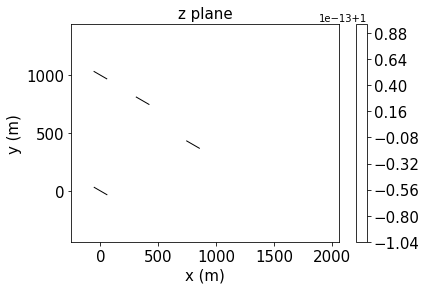

Iteration #7, Total Power Output = 5.153905520317409 MW


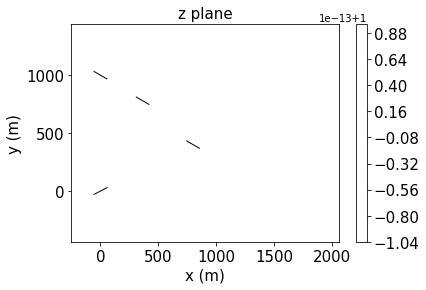

Iteration #14, Total Power Output = 6.300191621240693 MW


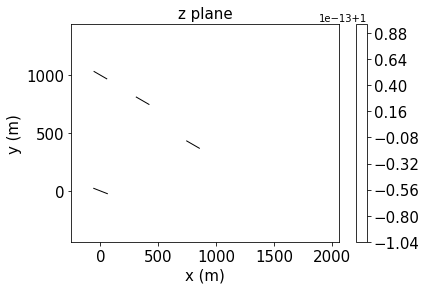

Iteration #21, Total Power Output = 6.304137585333026 MW


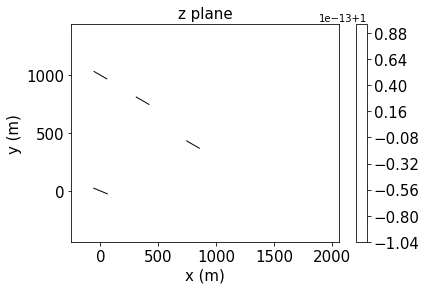

Iteration #28, Total Power Output = 6.304137593557546 MW


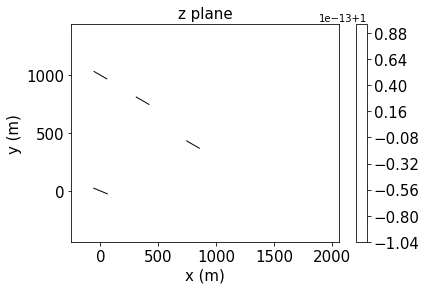

Iteration #35, Total Power Output = 6.033739587648192 MW


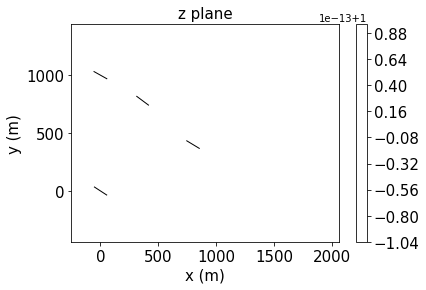

Iteration #42, Total Power Output = 6.246996905761962 MW


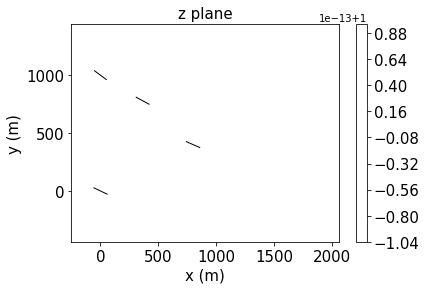

Iteration #49, Total Power Output = 6.298588250460971 MW


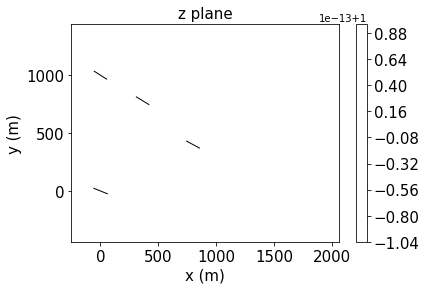

Iteration #56, Total Power Output = 6.303593965996715 MW


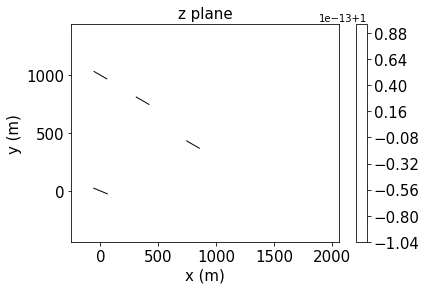

Iteration #63, Total Power Output = 6.304137421079228 MW


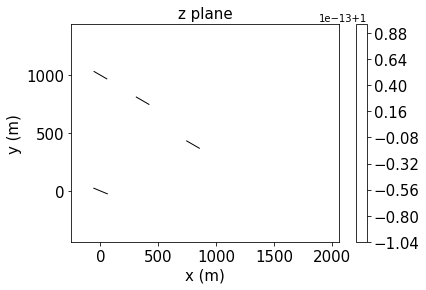

Iteration #70, Total Power Output = 6.304137592089559 MW


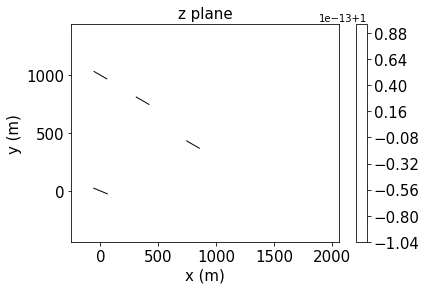

Iteration #77, Total Power Output = 6.17075324658074 MW


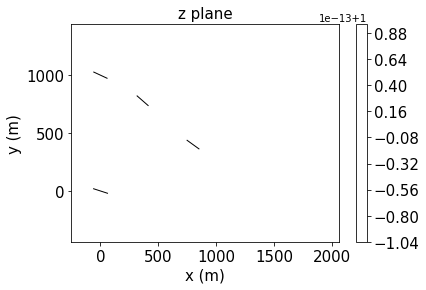

Iteration #84, Total Power Output = 2.131312632352206 MW


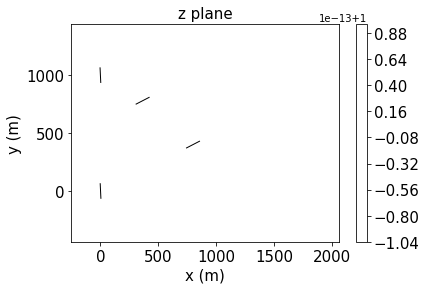

Iteration #91, Total Power Output = 6.297600700469531 MW


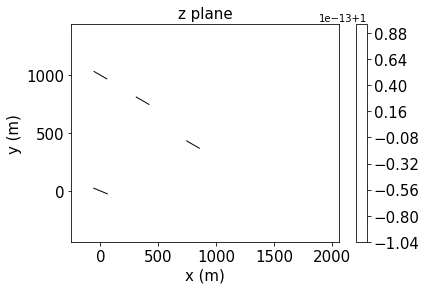

Iteration #98, Total Power Output = 6.3011212008981 MW


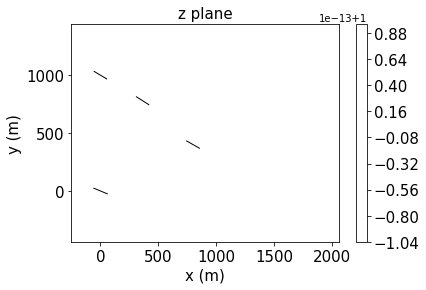

Iteration #105, Total Power Output = 6.3032437460399455 MW


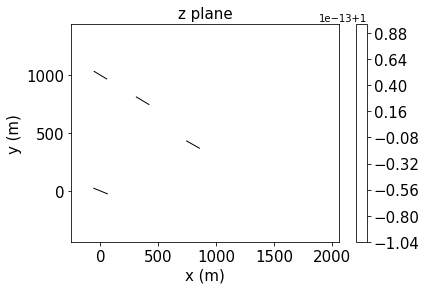

Iteration #112, Total Power Output = 6.3041345871436585 MW


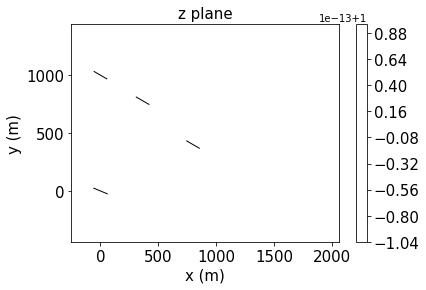

Iteration #119, Total Power Output = 6.30413725321761 MW


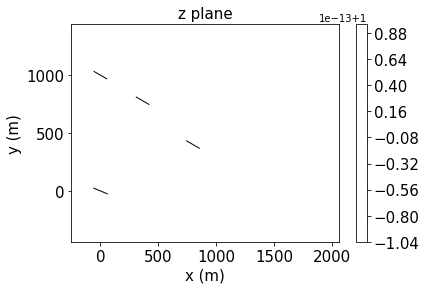

Iteration #126, Total Power Output = 6.304137593526406 MW


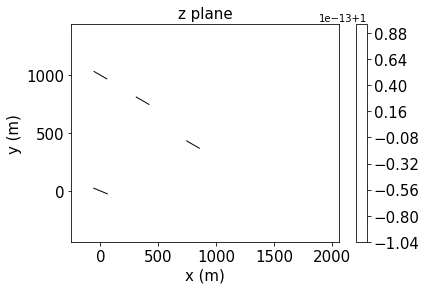

Iteration #133, Total Power Output = 6.3041375935575825 MW


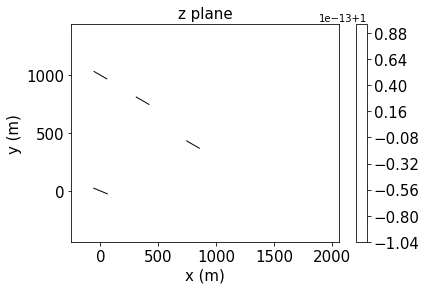

Iteration #140, Total Power Output = 5.025734679357145 MW


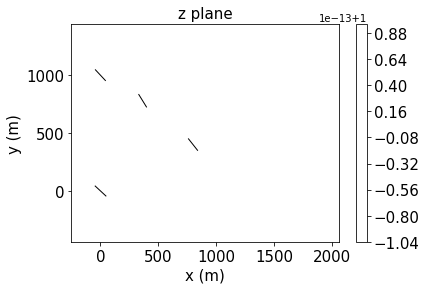

Iteration #147, Total Power Output = 6.259438148284484 MW


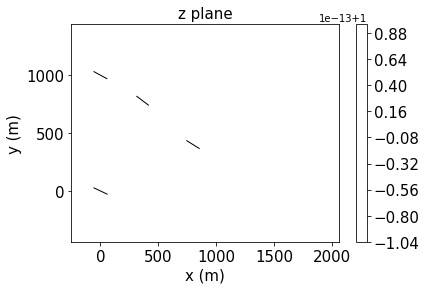

Iteration #154, Total Power Output = 6.0321273444616965 MW


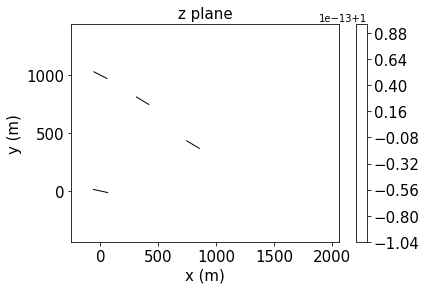

Iteration #161, Total Power Output = 6.295260928692816 MW


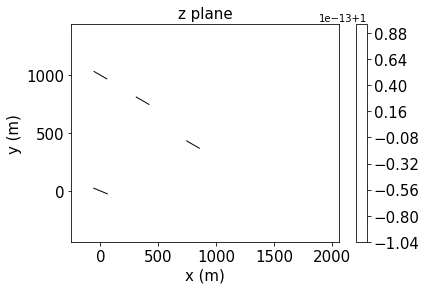

Iteration #168, Total Power Output = 6.304128565768402 MW


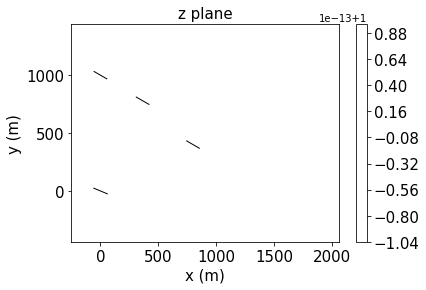

Iteration #175, Total Power Output = 6.3041375854177195 MW


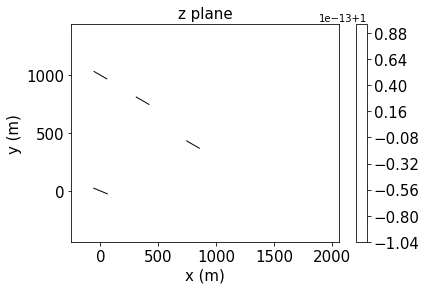

Iteration #182, Total Power Output = 5.713175764544138 MW


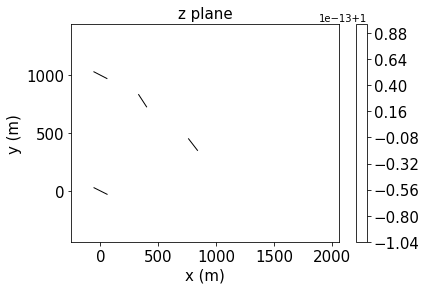

Iteration #189, Total Power Output = 1.9888899721861102 MW


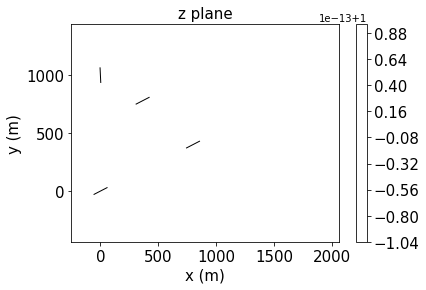

Iteration #196, Total Power Output = 6.2594841163786645 MW


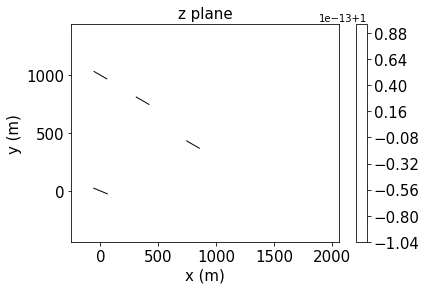

Iteration #203, Total Power Output = 6.282709145077634 MW


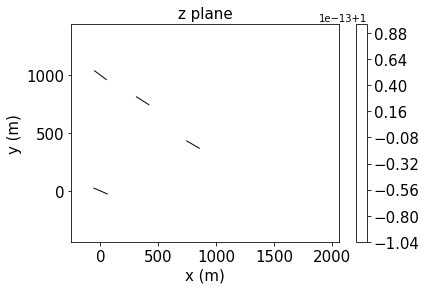

Iteration #210, Total Power Output = 6.298485474544641 MW


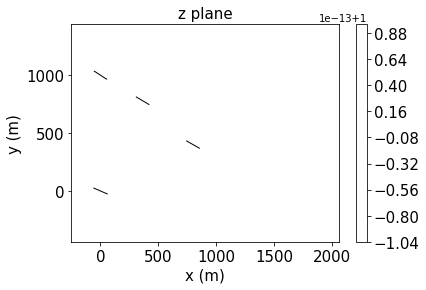

Iteration #217, Total Power Output = 6.304135710472448 MW


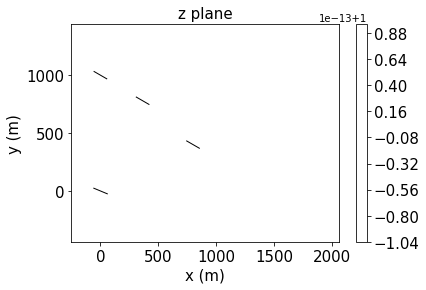

Iteration #224, Total Power Output = 6.304137548047699 MW


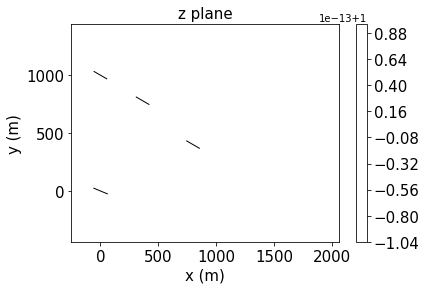

Iteration #231, Total Power Output = 6.30413759355702 MW


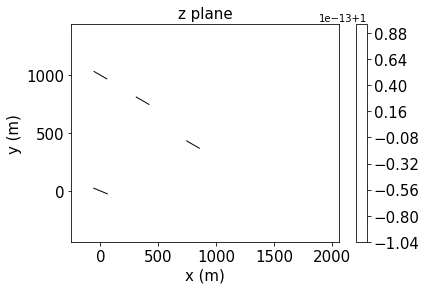

Iteration #238, Total Power Output = 5.048178587778055 MW


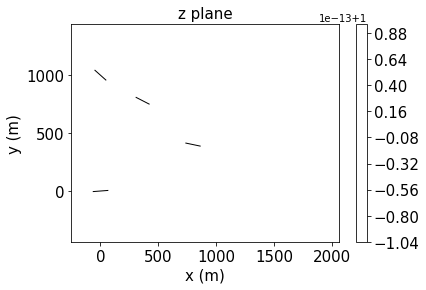

Iteration #245, Total Power Output = 2.131312663862501 MW


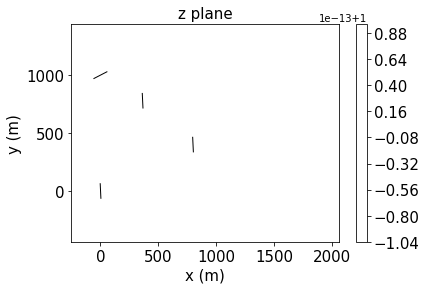

Iteration #252, Total Power Output = 5.524919153103018 MW


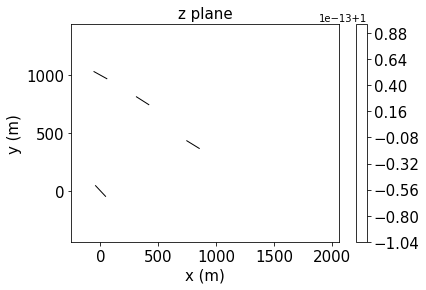

Iteration #259, Total Power Output = 6.241591751016848 MW


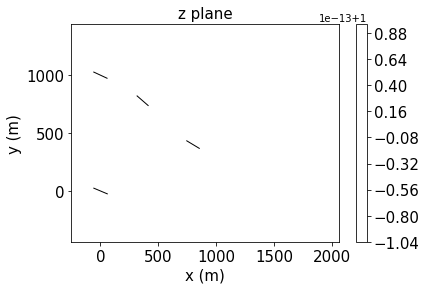

Iteration #266, Total Power Output = 6.303988937975977 MW


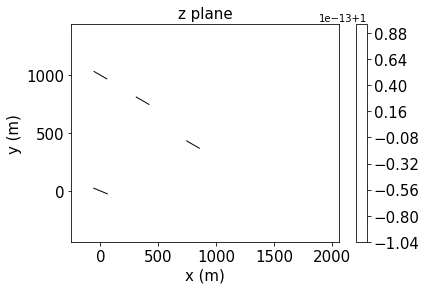

Iteration #273, Total Power Output = 6.304135859024735 MW


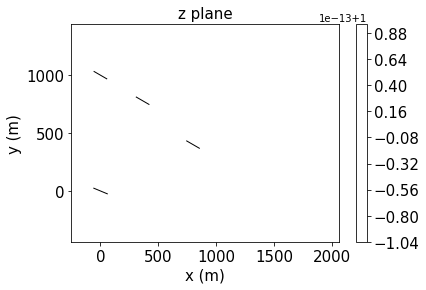

Iteration #280, Total Power Output = 6.3041374162345125 MW


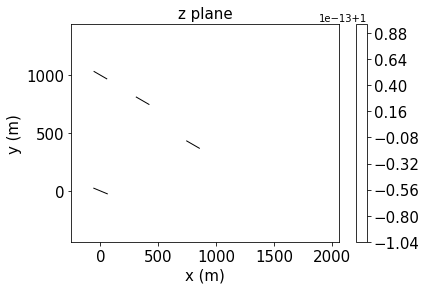

Iteration #287, Total Power Output = 6.304137593557427 MW


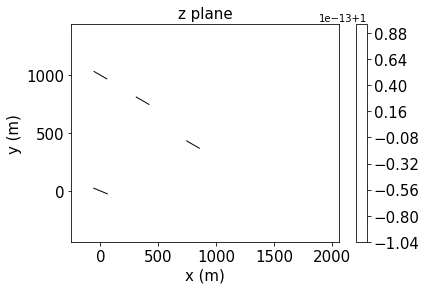

Iteration #294, Total Power Output = 5.246313849439608 MW


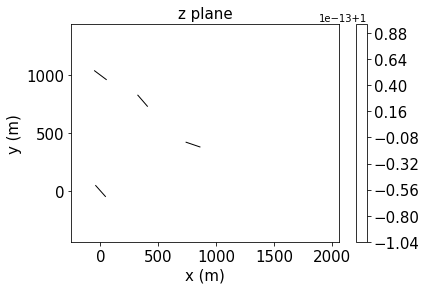

Iteration #301, Total Power Output = 6.027390077996974 MW


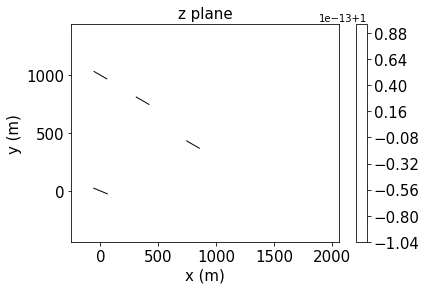

Iteration #308, Total Power Output = 1.9888899735872494 MW


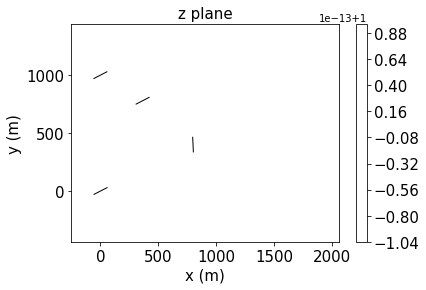

Iteration #315, Total Power Output = 6.176601084785076 MW


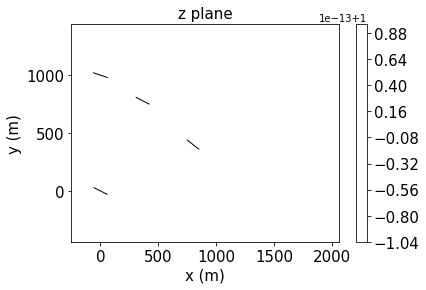

Iteration #322, Total Power Output = 6.298818451534659 MW


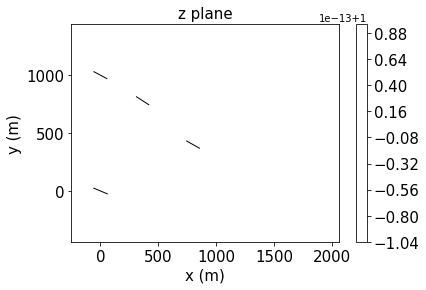

Iteration #329, Total Power Output = 6.303274837162085 MW


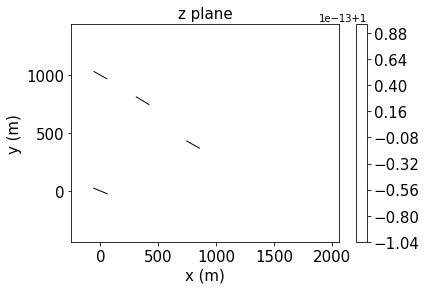

Iteration #336, Total Power Output = 6.304137571616331 MW


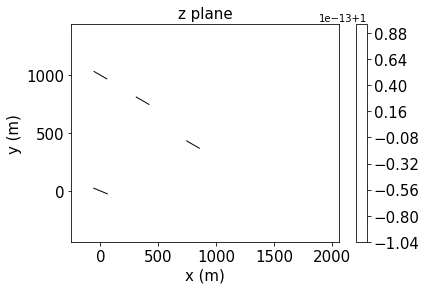

Iteration #343, Total Power Output = 6.304137593106044 MW


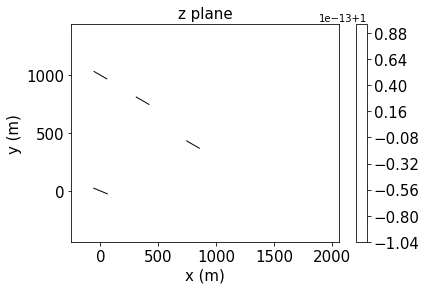

Iteration #350, Total Power Output = 6.304137593431602 MW


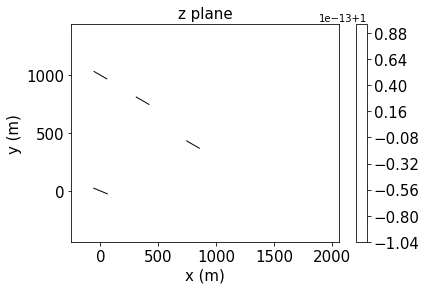

Iteration #357, Total Power Output = 1.9888899673987581 MW


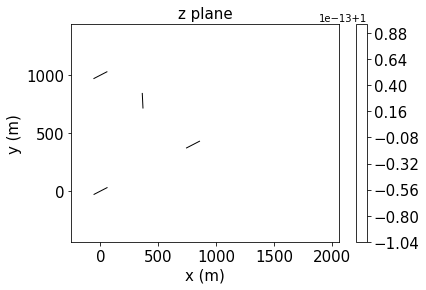

Iteration #364, Total Power Output = 6.219829348732343 MW


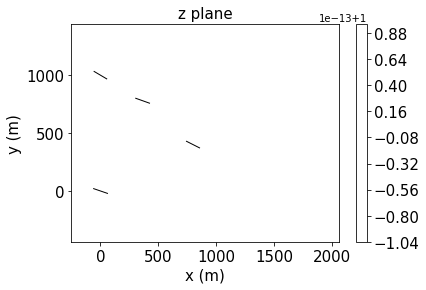

Iteration #371, Total Power Output = 6.293808522984391 MW


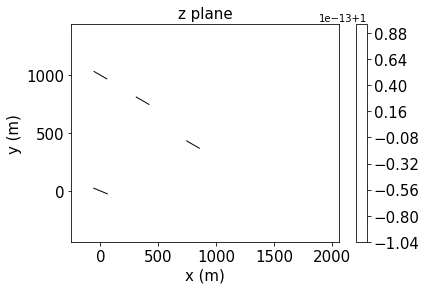

Iteration #378, Total Power Output = 6.303572465000491 MW


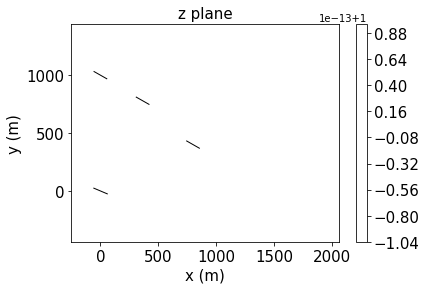

Iteration #385, Total Power Output = 6.304132553559002 MW


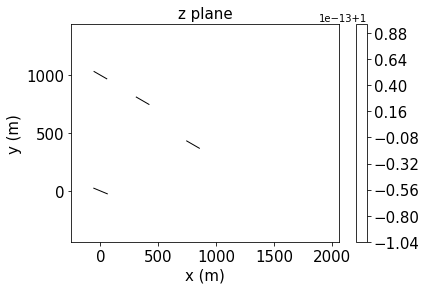

Iteration #392, Total Power Output = 6.304137589271529 MW


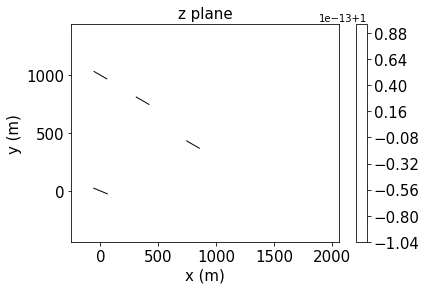

Iteration #399, Total Power Output = 6.304137593557033 MW


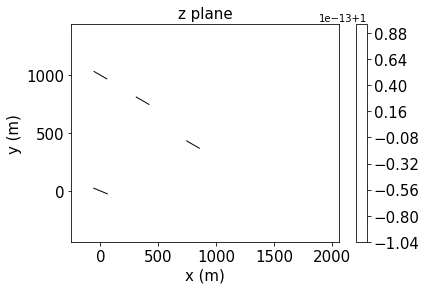

Iteration #406, Total Power Output = 1.9888899831539053 MW


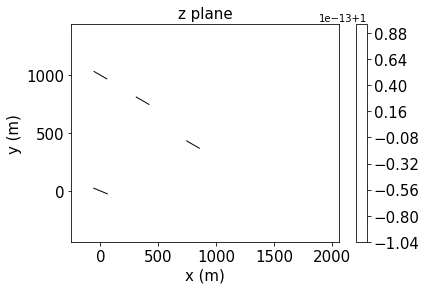

Iteration #413, Total Power Output = 6.187437201160247 MW


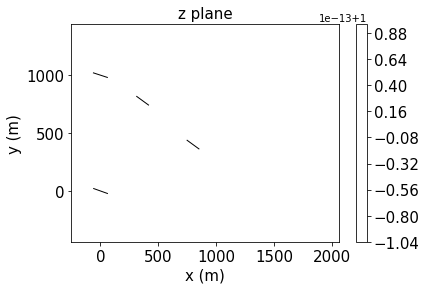

Iteration #420, Total Power Output = 6.273091360758497 MW


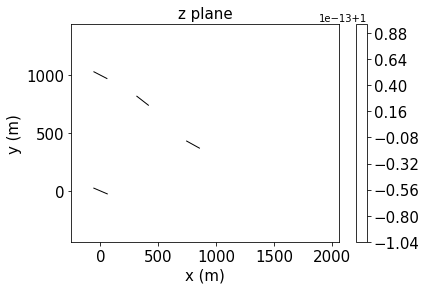

Iteration #427, Total Power Output = 6.3041253468730005 MW


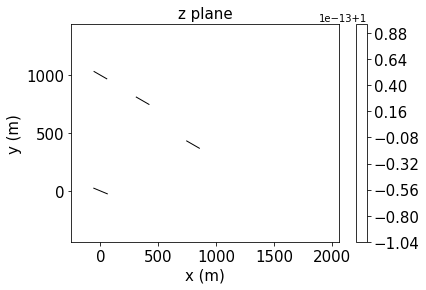

Iteration #434, Total Power Output = 6.304135591445603 MW


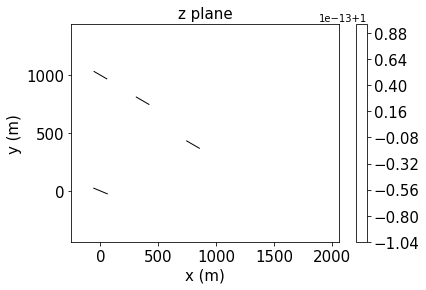

Iteration #441, Total Power Output = 6.304137593300824 MW


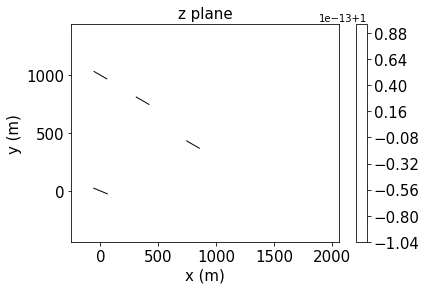

Iteration #448, Total Power Output = 5.90732360827188 MW


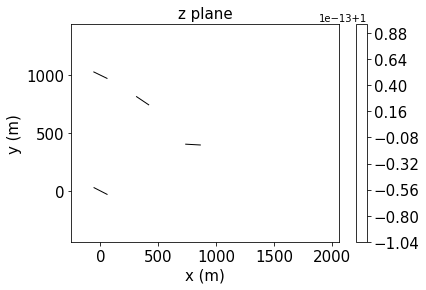

Iteration #455, Total Power Output = 1.9888899989090527 MW


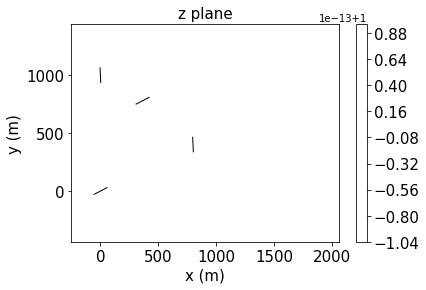

Iteration #462, Total Power Output = 6.248362022209191 MW


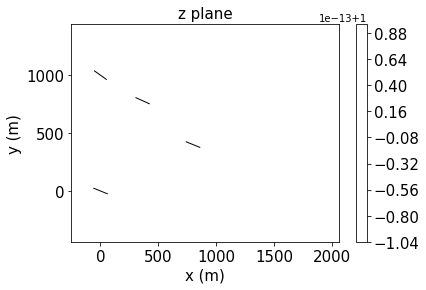

Iteration #469, Total Power Output = 6.284782575278781 MW


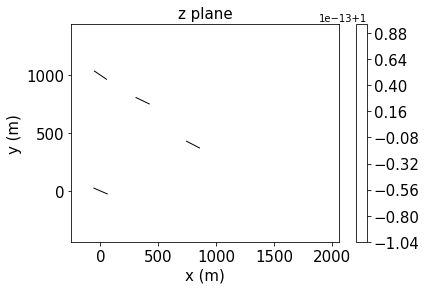

Iteration #476, Total Power Output = 6.304135416821564 MW


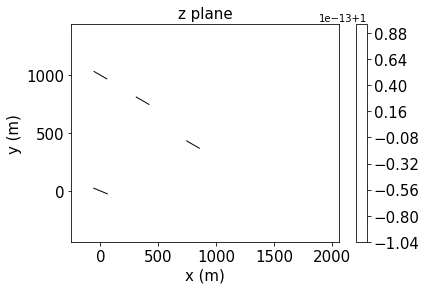

Iteration #483, Total Power Output = 6.3041375493482255 MW


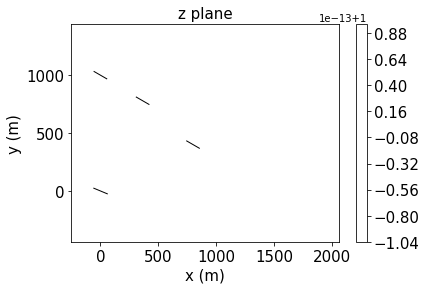

Iteration #490, Total Power Output = 6.304137571602045 MW


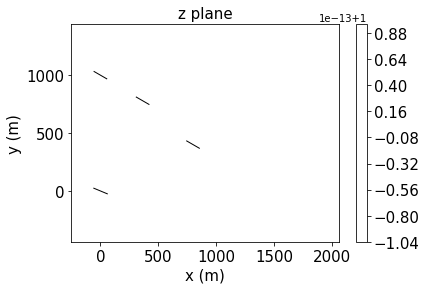

Iteration #497, Total Power Output = 6.3041375935555495 MW


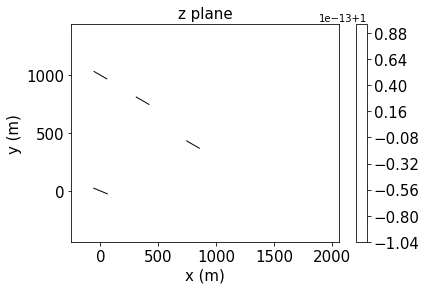

Iteration #504, Total Power Output = 6.187806104660132 MW


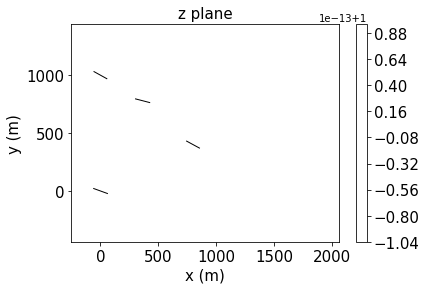

Iteration #511, Total Power Output = 6.203444037715997 MW


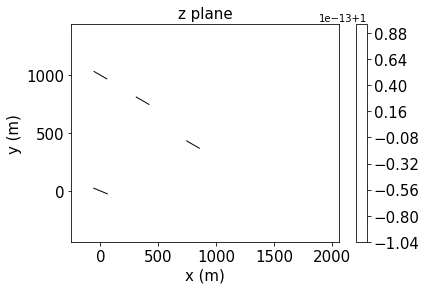

Iteration #518, Total Power Output = 6.273532715600315 MW


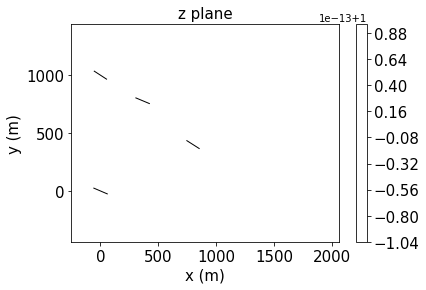

Iteration #525, Total Power Output = 6.290334980252222 MW


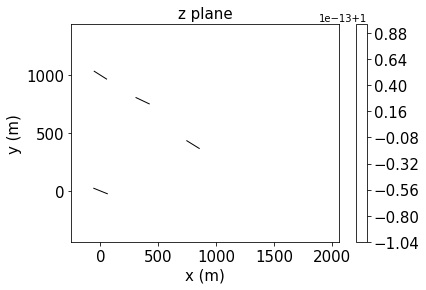

Iteration #532, Total Power Output = 6.303053867084672 MW


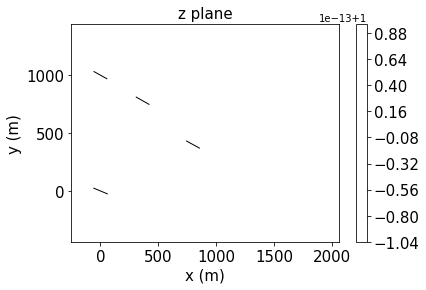

Iteration #539, Total Power Output = 6.304119158422369 MW


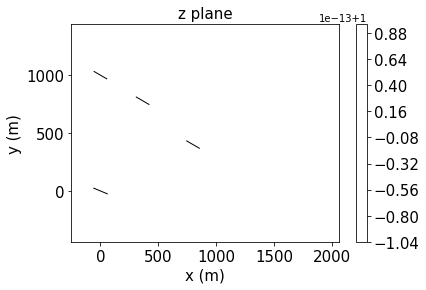

Iteration #546, Total Power Output = 6.304137552851675 MW


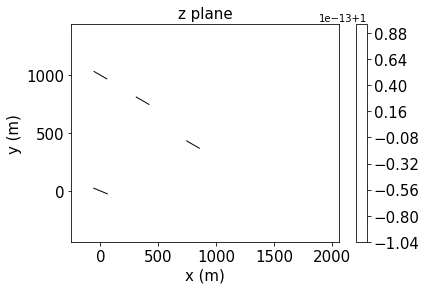

Iteration #553, Total Power Output = 6.304137582899871 MW


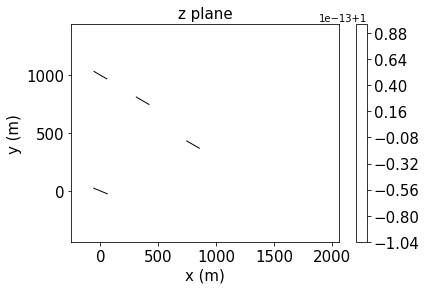

Iteration #560, Total Power Output = 6.304137593489276 MW


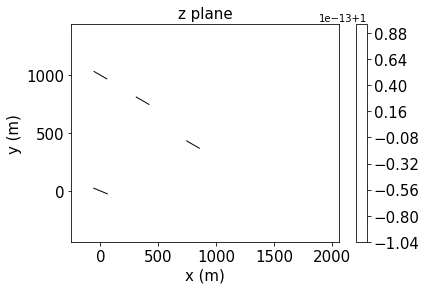

Iteration #567, Total Power Output = 1.9888899989090525 MW


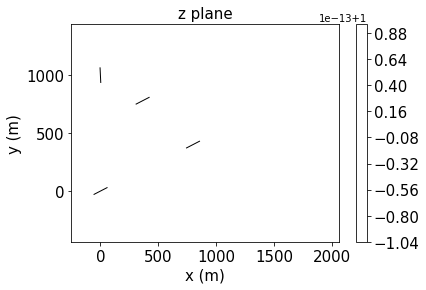

Iteration #574, Total Power Output = 6.172576202632041 MW


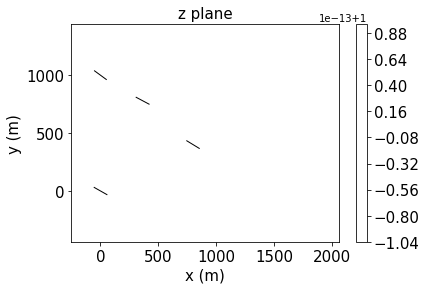

Iteration #581, Total Power Output = 6.283287326756391 MW


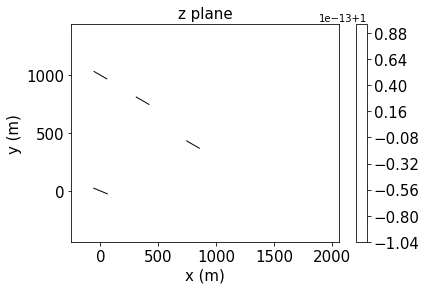

Iteration #588, Total Power Output = 6.2961575013377145 MW


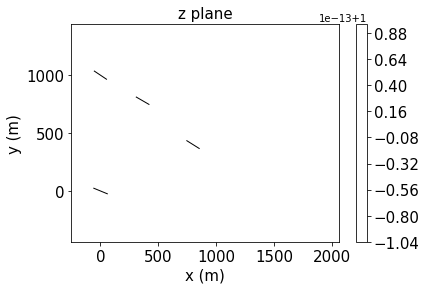

Iteration #595, Total Power Output = 6.301406633663365 MW


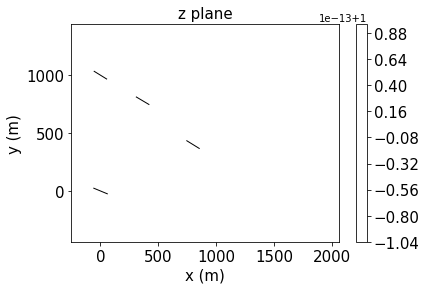

Iteration #602, Total Power Output = 6.304137473293286 MW


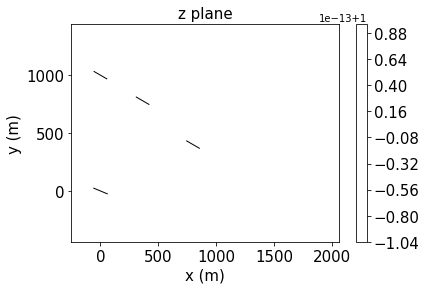

Iteration #609, Total Power Output = 6.304137593058522 MW


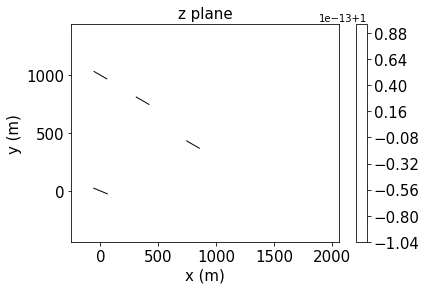

Iteration #616, Total Power Output = 5.4238179262449595 MW


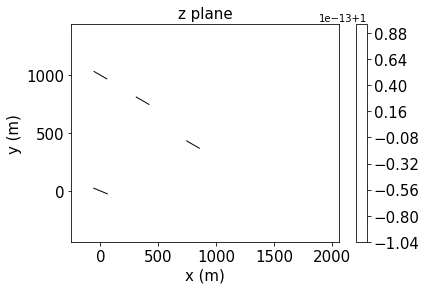

Iteration #623, Total Power Output = 2.13131266141383 MW


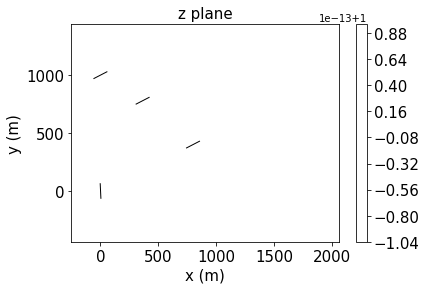

Iteration #630, Total Power Output = 6.1921401796276125 MW


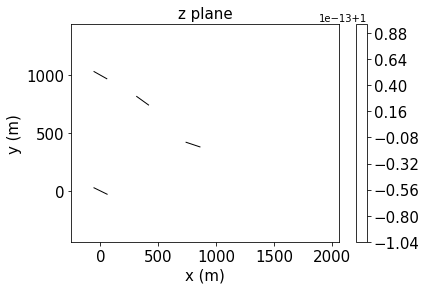

Iteration #637, Total Power Output = 6.2892209102178445 MW


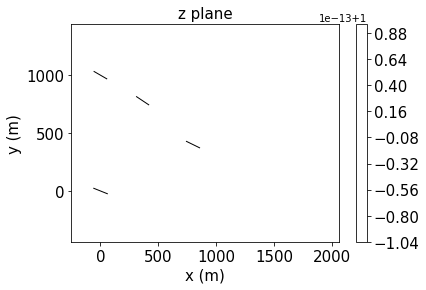

Iteration #644, Total Power Output = 6.30397639172469 MW


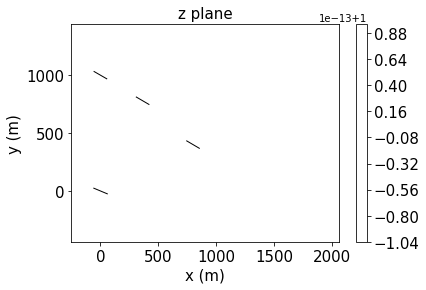

Iteration #651, Total Power Output = 6.304134490119793 MW


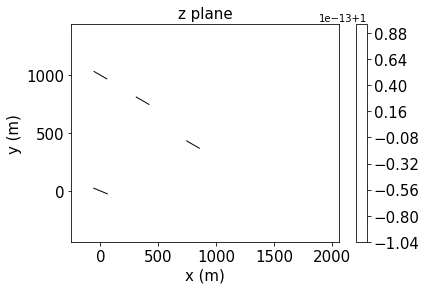

Iteration #658, Total Power Output = 6.304137554176964 MW


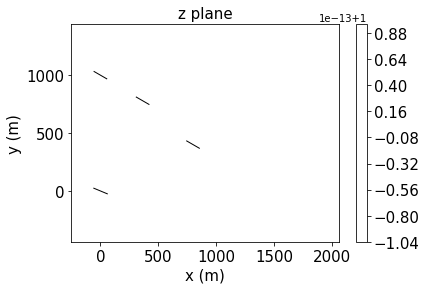

Iteration #665, Total Power Output = 6.304137593555136 MW


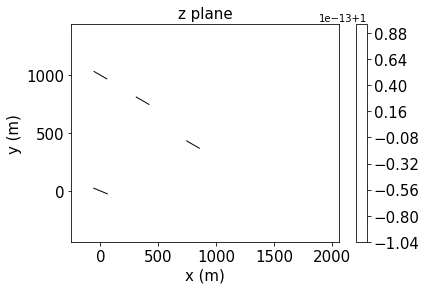

Iteration #672, Total Power Output = 5.278837300339199 MW


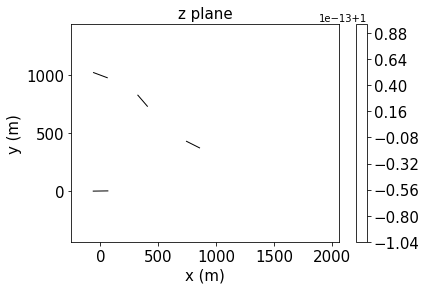

Iteration #679, Total Power Output = 2.131312632352206 MW


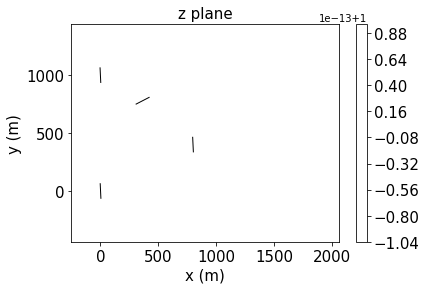

Iteration #686, Total Power Output = 6.00045471728653 MW


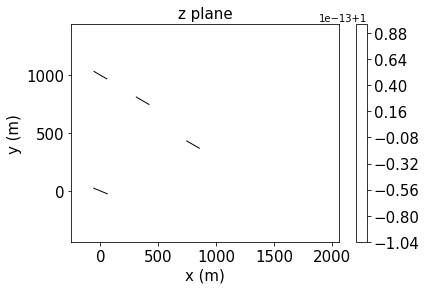

Iteration #693, Total Power Output = 6.262512162687106 MW


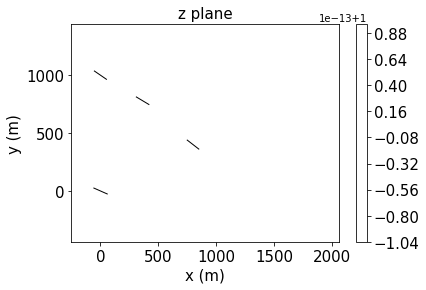

Iteration #700, Total Power Output = 6.2918278507786765 MW


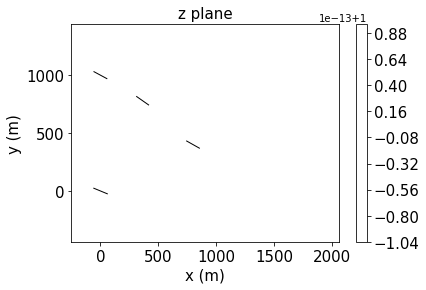

Iteration #707, Total Power Output = 6.304136975244347 MW


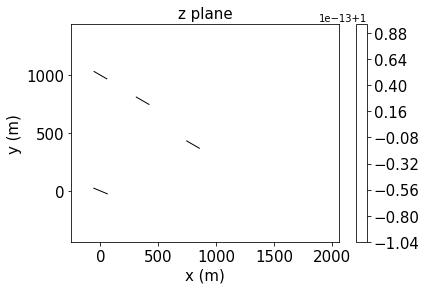

Iteration #714, Total Power Output = 6.304137584131413 MW


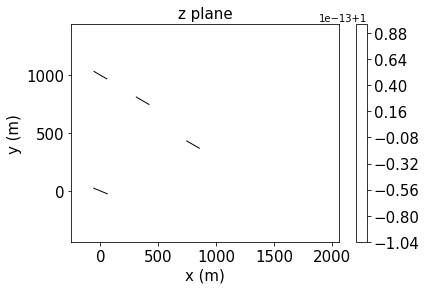

In [7]:
# reload optimisation_manager if edited
imp.reload(optimisation_manager)

# print evolution of optimised turbine locations

evolution_name = loc_yaw_name
evolution_data = loc_yaw_data
evolution_variables = yaw_variables
num_plots = 100

optimisation_manager.print_evolution(loc_floris, evolution_name, evolution_data, evolution_variables, num_plots)


## Wake vs Flow Direction

Power Output at 185.0 degree Flow Direction = 0.07014308148622295 MW


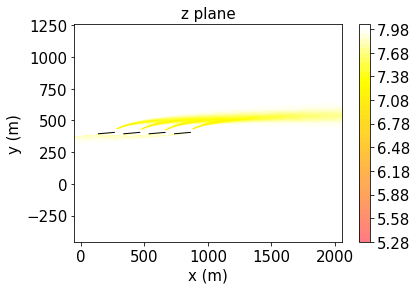

Power Output at 195.0 degree Flow Direction = 0.5428243787442434 MW


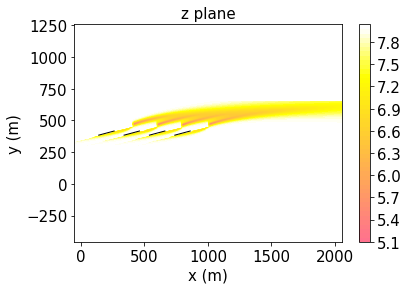

Power Output at 205.0 degree Flow Direction = 1.3066798552605134 MW


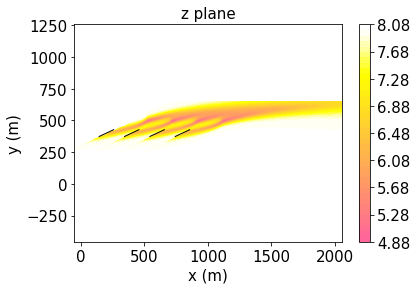

Power Output at 215.0 degree Flow Direction = 2.0749122601300276 MW


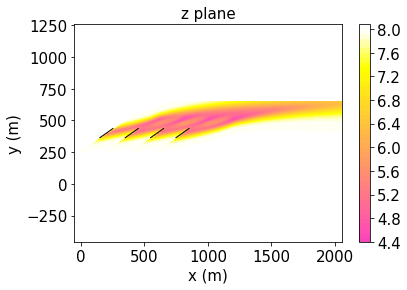

Power Output at 225.0 degree Flow Direction = 2.6604371577075523 MW


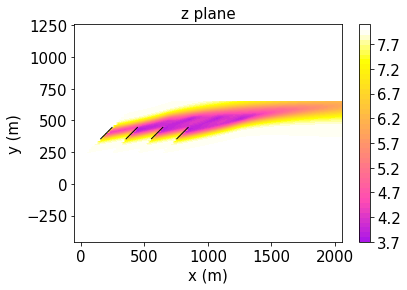

Power Output at 235.0 degree Flow Direction = 2.9040658559563237 MW


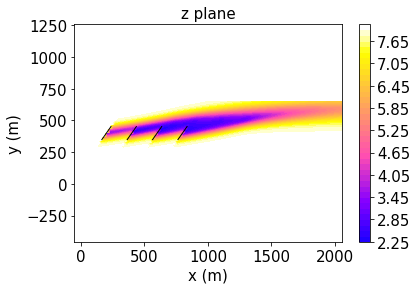

Power Output at 245.0 degree Flow Direction = 2.7383897066691896 MW


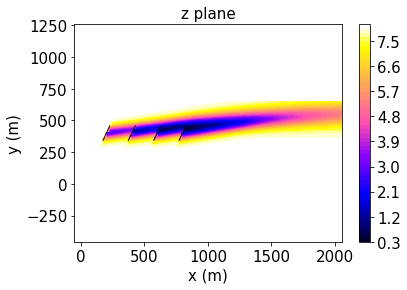

Power Output at 255.0 degree Flow Direction = 2.2923955932058746 MW


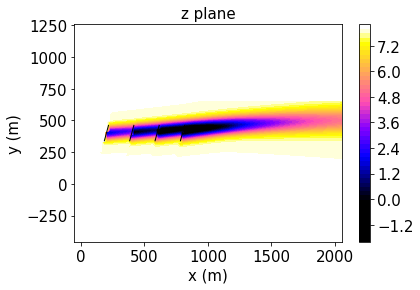

Power Output at 265.0 degree Flow Direction = 2.074340046109436 MW


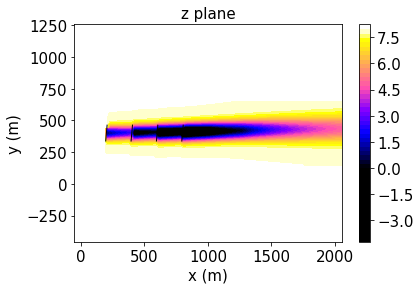

Power Output at 275.0 degree Flow Direction = 2.074340046109436 MW


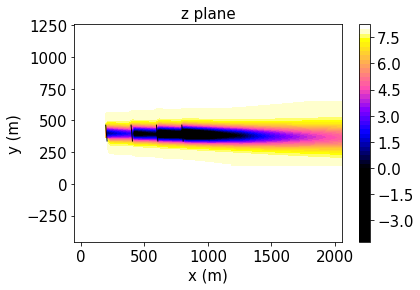

Power Output at 285.0 degree Flow Direction = 2.2923955932058737 MW


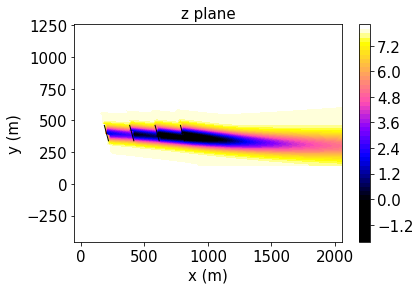

Power Output at 295.0 degree Flow Direction = 2.7383897066691874 MW


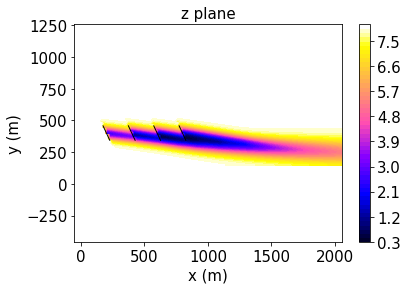

Power Output at 305.0 degree Flow Direction = 2.9040658559563215 MW


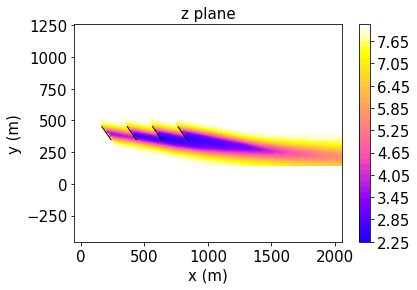

Power Output at 315.0 degree Flow Direction = 2.66043715770755 MW


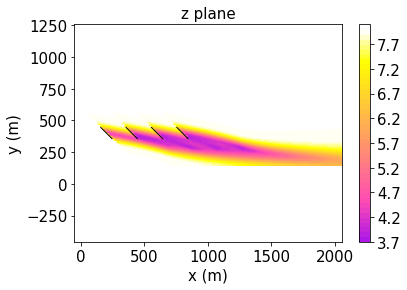

Power Output at 325.0 degree Flow Direction = 2.0749122601300263 MW


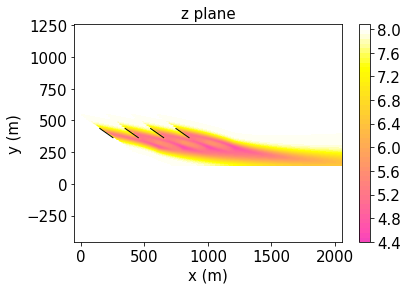

Power Output at 335.0 degree Flow Direction = 1.3066798552605132 MW


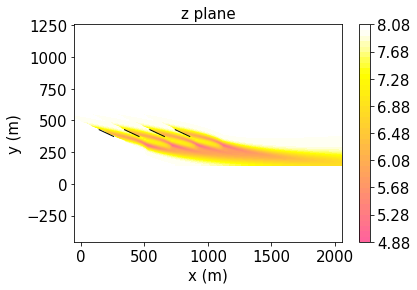

Power Output at 345.0 degree Flow Direction = 0.5428243787442434 MW


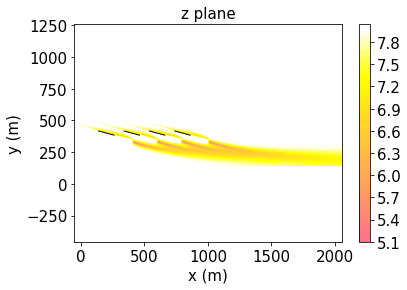

Text(0,0.5,'Power Output (MW)')

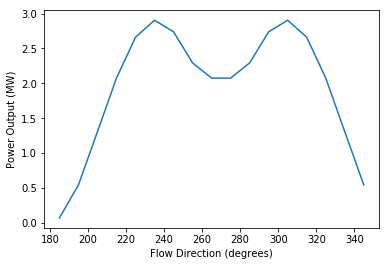

In [8]:
# reload optimisation_manager if edited
imp.reload(optimisation_manager)

# initialise floris objec tand file name
direction_floris = Floris('{}.json'.format(case))
direction_name = '{}_direction'.format(case)

turbines = [turbine for _, turbine in direction_floris.farm.flow_field.turbine_map.items()]
num_turbines = len(turbines)
angles = []
power = []

for d in range(-85, 85, 10):
    #direction_floris.farm.flow_field.wind_direction = np.float(d)
    optimisation_manager.set_turbine_attr_vec(np.repeat(range(num_turbines), 1), np.repeat(turbines, 1), \
                     np.repeat(range(1), num_turbines, axis=0), np.repeat(['yaw_angle'], num_turbines, axis=0), \
                     np.ones(num_turbines) * np.radians(d), num_turbines)
    direction_floris.farm.flow_field.calculate_wake()
    flow_field_viz = direction_floris.farm.flow_field
    visualization_manager = VisualizationManager(flow_field_viz, direction_name, plot_wakes=True)
    power.append(optimisation_manager.calc_power(direction_floris)[1] / 10**6)
    angles.append(270.0 + d)
    print('Power Output at {} degree Flow Direction = {} MW'.format(angles[-1], power[-1]))
    visualization_manager.plot_z_planes([0.5])
    
fig, ax = plt.subplots()
ax.plot(angles, power)
ax.set_xlabel('Flow Direction (degrees)')
ax.set_ylabel('Power Output (MW)')

## Optimise Yaw Angle for Different Wind Directions

Optimizing...
Number of parameters to optimize =  4
basinhopping step 0: f -3.11648e+06
basinhopping step 1: f -3.29742e+06 trial_f -3.29742e+06 accepted 1  lowest_f -3.29742e+06
found new global minimum on step 1 with function value -3.29742e+06
basinhopping step 2: f -3.29742e+06 trial_f -3.29742e+06 accepted 1  lowest_f -3.29742e+06
basinhopping step 3: f -3.29742e+06 trial_f -3.29742e+06 accepted 1  lowest_f -3.29742e+06
basinhopping step 4: f -3.29742e+06 trial_f -3.29742e+06 accepted 1  lowest_f -3.29742e+06
basinhopping step 5: f -3.29742e+06 trial_f -3.29742e+06 accepted 1  lowest_f -3.29742e+06
found new global minimum on step 5 with function value -3.29742e+06
basinhopping step 6: f -3.29742e+06 trial_f -3.29742e+06 accepted 1  lowest_f -3.29742e+06
found new global minimum on step 6 with function value -3.29742e+06
basinhopping step 7: f -3.29742e+06 trial_f -3.29742e+06 accepted 1  lowest_f -3.29742e+06
basinhopping step 8: f -3.29742e+06 trial_f -3.29742e+06 accepted 1  lo

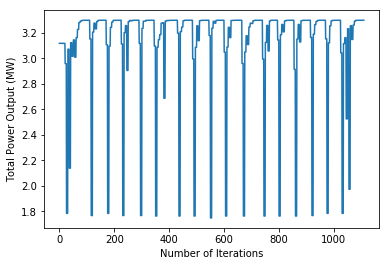

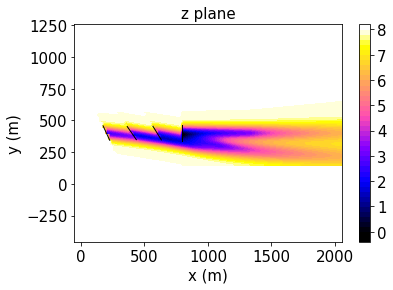

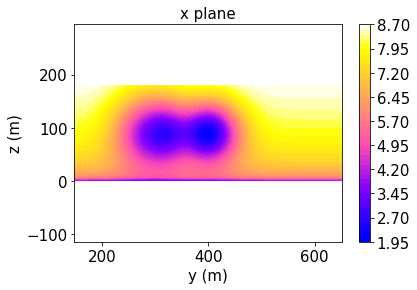

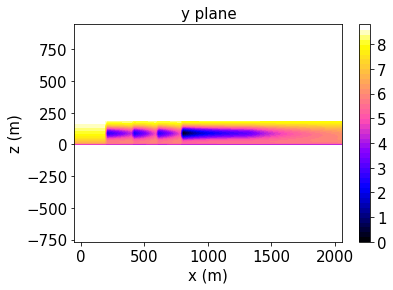

Optimizing...
Number of parameters to optimize =  4
basinhopping step 0: f -6.84801e+06
basinhopping step 1: f -6.84801e+06 trial_f -6.84801e+06 accepted 1  lowest_f -6.84801e+06
basinhopping step 2: f -6.84801e+06 trial_f -6.84801e+06 accepted 1  lowest_f -6.84801e+06
basinhopping step 3: f -6.84801e+06 trial_f -6.84801e+06 accepted 1  lowest_f -6.84801e+06
found new global minimum on step 3 with function value -6.84801e+06
basinhopping step 4: f -6.84801e+06 trial_f -6.84801e+06 accepted 1  lowest_f -6.84801e+06
basinhopping step 5: f -6.84801e+06 trial_f -6.84801e+06 accepted 1  lowest_f -6.84801e+06
basinhopping step 6: f -6.84801e+06 trial_f -6.84801e+06 accepted 1  lowest_f -6.84801e+06
basinhopping step 7: f -6.84801e+06 trial_f -6.84801e+06 accepted 1  lowest_f -6.84801e+06


In [ ]:
# reload optimisation_manager if edited
imp.reload(optimisation_manager)

# initialise floris objec tand file name
yaw_direction_name = '{}_yaw_direction'.format(case)

# set bounds for the optimization on the turbine parameters (radians for angles)
minimum_values = [-1]
maximum_values = [1]

angles = [0.0, 90.0, 180.0, 270.0]
power = []

for a in range(len(angles)):
    yaw_direction_floris = Floris('{}.json'.format(case))
    yaw_direction_floris.farm.flow_field.wind_direction = np.radians(angles[a])
    #yaw_direction_floris.farm.flow_field.calculate_wake()
    # compute the optimal yaw angles
    yaw_direction_opt_params, yaw_direction_opt_power, yaw_direction_data = optimisation_manager.optimise_func(yaw_direction_floris, yaw_variables, minimum_values, maximum_values, yaw_direction_name, case, global_search=True)

    flow_field_viz = yaw_direction_floris.farm.flow_field
    visualization_manager = VisualizationManager(flow_field_viz, yaw_direction_name, plot_wakes=True)
    power_output = optimisation_manager.calc_power(yaw_direction_floris)
    power.append(power_output[1])
    
fig, ax = plt.subplots()
ax.plot(270.0 - np.asarray(angles), power)
ax.set_xlabel('Flow Direction (degrees)')
ax.set_ylabel('Power Output (MW)')
ax.set_xticks(angles)